In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
df =pd.read_csv('city_day.csv')

In [3]:
df.head()

City        Date  PM2.5  PM10  NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN NaN  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN NaN  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN NaN  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN NaN  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN NaN  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN

In [4]:
df['Date']=pd.to_datetime(df['Date'])
df['year']=df['Date'].dt.year
df.head()

City       Date  PM2.5  PM10  NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad 2015-01-01    NaN   NaN NaN  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad 2015-01-02    NaN   NaN NaN  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad 2015-01-03    NaN   NaN NaN  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad 2015-01-04    NaN   NaN NaN  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad 2015-01-05    NaN   NaN NaN  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  year  
0  133.36     0.00     0.02    0.00  NaN        NaN  2015  
1   34.06     3.68     5.50    3.77  NaN        NaN  2015  
2   30.70     6.80    16.40    2.25  NaN        NaN  2015  
3   36.08     4.43    10.14    1.00  NaN        NaN  2015  
4   39.31     7.01    18.89    2.78  NaN        NaN  2015

In [5]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='AQI', ylabel='Density'>

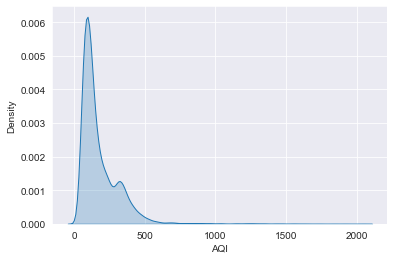

In [6]:
sns.kdeplot(data =df['AQI'],label="AQI",shade=True)

# which city has low AQI

In [7]:
aqi=df.groupby('City')['AQI'].min().reset_index()

In [8]:
aqi=aqi.sort_values('AQI')

In [9]:
aqi =aqi.head(10)

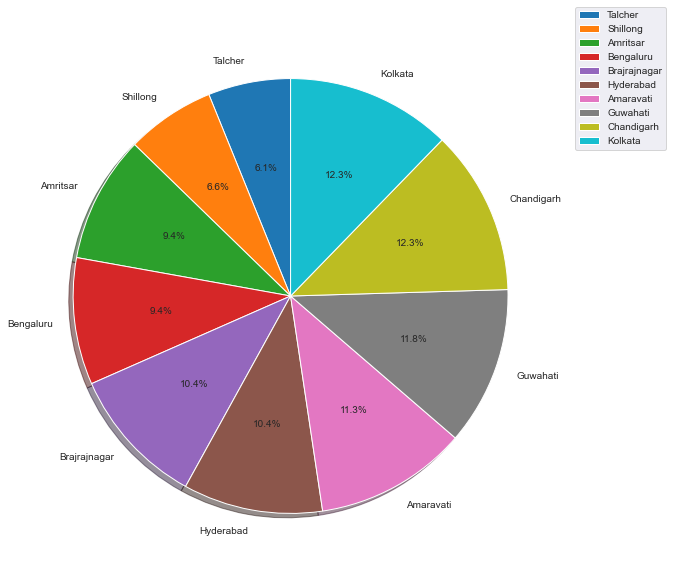

In [10]:
fix1,ax =plt.subplots(figsize=(15,10))
ax.pie(aqi["AQI"].tolist(),labels=aqi["City"].tolist(),autopct='%1.1f%%',shadow =True,startangle=90)
plt.legend(loc="right",bbox_to_anchor=(1.2,0.9))
plt.show()

In [11]:
import plotly.express as px
perc =df.loc[:,['year','City','AQI']]
perc['mean_aqi']=perc.groupby([perc.City,perc.year])['AQI'].transform('mean')
perc.drop('AQI',axis=1,inplace=True)
perc=perc.drop_duplicates()
perc=perc.sort_values('year',ascending=False)
top =['Talcher','Amritsar','Brajrajnagar']
perc =perc.loc[perc['City'].isin(top)]
perc=perc.sort_values('year')
perc=perc.fillna(100)
fig=px.bar(perc,x='City',y='mean_aqi',animation_frame='year',animation_group='City',color='City',hover_name='City')
fig.show()

# looking at each city with high AQI

In [12]:
aqi = df.groupby('City')['AQI'].max().reset_index()
aqi = aqi.sort_values('AQI')
aqi = aqi.tail(10)
aqi

City     AQI
20     Talcher   570.0
14  Jorapokhar   604.0
18       Patna   619.0
16     Lucknow   707.0
9        Delhi   716.0
12   Hyderabad   737.0
3     Amritsar   869.0
10    Gurugram   891.0
11    Guwahati   956.0
0    Ahmedabad  2049.0

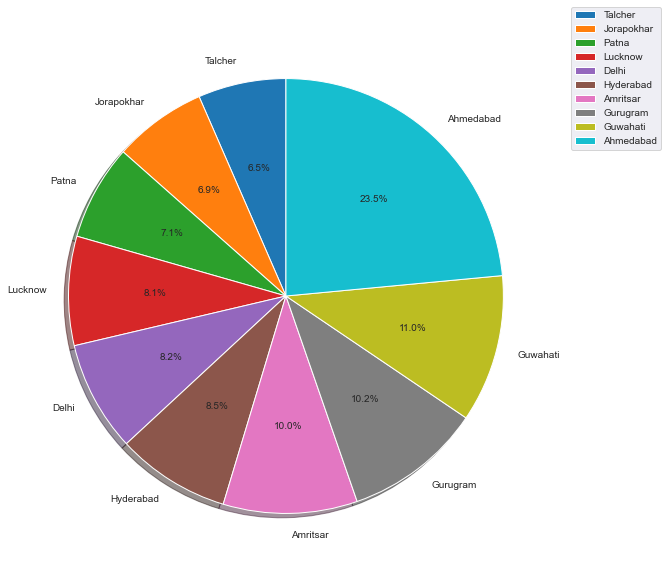

In [13]:
fig1,ax =plt.subplots(figsize=(15,10))
ax.pie(aqi['AQI'].tolist(),labels=aqi['City'].tolist(),autopct='%1.1f%%',shadow=True,startangle=90)
plt.legend(loc='right',bbox_to_anchor=(1.2,0.9))
plt.show()

In [14]:
perc=df.loc[:,['City','AQI','year']]
perc['mean_aqi']=perc.groupby([perc.City,perc.year])['AQI'].transform('mean')
perc.drop('AQI',inplace=True,axis=1)
perc=perc.drop_duplicates()
perc=perc.sort_values('year',ascending=False)
top1=['Ahemdabad','Hyderabad','Amritsar','Gurugram','Guwahati']
perc=perc.loc[perc['City'].isin(top1)]
perc=perc.sort_values('year')
perc=perc.fillna(100)
fig=px.bar(perc,x='City',y='mean_aqi',animation_frame='year',animation_group='City',color='City',hover_name='City')
fig.show()

In [15]:
perc = df.loc[:, ["year", "City","AQI"]]
perc['mean_AQI']=perc.groupby([perc.City, perc.year])["AQI"].transform('mean')
perc.drop('AQI', axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc.sort_values('year', ascending=False)
top1 = ['Hyderabad', 'Amritsar', 'Gurugram', 'Guwahati', 'Ahmedabad']
perc = perc.loc[perc['City'].isin(top1)]
perc = perc.sort_values(by='year')
perc = perc.fillna(100)
fig = px.bar(perc, x='City', y='mean_AQI', animation_frame='year', animation_group='City', color='City',
            hover_name='City')
fig.show()

In [16]:
df.head()

City       Date  PM2.5  PM10  NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad 2015-01-01    NaN   NaN NaN  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad 2015-01-02    NaN   NaN NaN  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad 2015-01-03    NaN   NaN NaN  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad 2015-01-04    NaN   NaN NaN  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad 2015-01-05    NaN   NaN NaN  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  year  
0  133.36     0.00     0.02    0.00  NaN        NaN  2015  
1   34.06     3.68     5.50    3.77  NaN        NaN  2015  
2   30.70     6.80    16.40    2.25  NaN        NaN  2015  
3   36.08     4.43    10.14    1.00  NaN        NaN  2015  
4   39.31     7.01    18.89    2.78  NaN        NaN  2015

In [17]:
data1 = df['AQI'].dropna()
top_10_city = df.loc[data1.index].groupby('City')['AQI'].mean().reset_index()
top_10_city.sort_values('AQI', ascending=False, inplace=True)
top_10_city.head(10)

City         AQI
0      Ahmedabad  473.912281
9          Delhi  262.255086
18         Patna  248.270153
10      Gurugram  230.518600
16       Lucknow  222.881833
20       Talcher  179.990506
14    Jorapokhar  162.746009
11      Guwahati  156.486683
15       Kolkata  151.535714
6   Brajrajnagar  151.519345

In [18]:
#array of the top 10 cities with highest AQI
top_cities = top_10_city.head(10)['City'].tolist()
top_cities

['Ahmedabad',
 'Delhi',
 'Patna',
 'Gurugram',
 'Lucknow',
 'Talcher',
 'Jorapokhar',
 'Guwahati',
 'Kolkata',
 'Brajrajnagar']

# talcher AQI map

In [19]:
#year wise mean of AQI of Talcher city
talcher = df[df['City'] == "Talcher"]
data_by_year = talcher.groupby('year')['AQI'].mean().reset_index().dropna()
data_by_year.head()

year         AQI
1  2018  185.744770
2  2019  169.023102
3  2020  201.633333

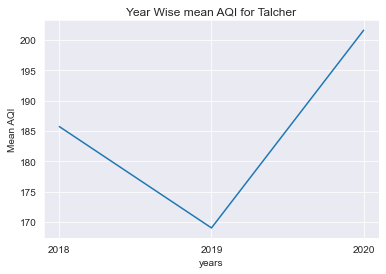

In [20]:
plt.plot(data_by_year['year'], data_by_year['AQI'])
plt.xticks(data_by_year['year'].tolist())
plt.title('Year Wise mean AQI for Talcher')
plt.xlabel("years")
plt.ylabel("Mean AQI")
plt.show()

# brajrajnagar AQI map

In [21]:
braj = df[df['City'] == "Brajrajnagar"]
data_by_year = braj.groupby('year')['AQI'].mean().reset_index().dropna()
data_by_year.head()

year         AQI
0  2017  247.600000
1  2018  154.996154
2  2019  148.400621
3  2020  140.762500

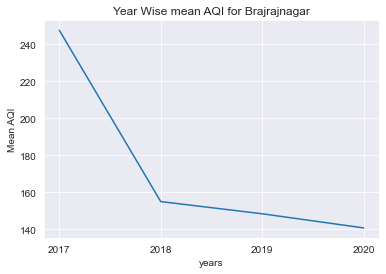

In [22]:
plt.plot(data_by_year['year'], data_by_year['AQI'])
plt.xticks(data_by_year['year'].tolist())
plt.title('Year Wise mean AQI for Brajrajnagar')
plt.xlabel("years")
plt.ylabel("Mean AQI")
plt.show()

# plotting line plot year wise for AQI cities

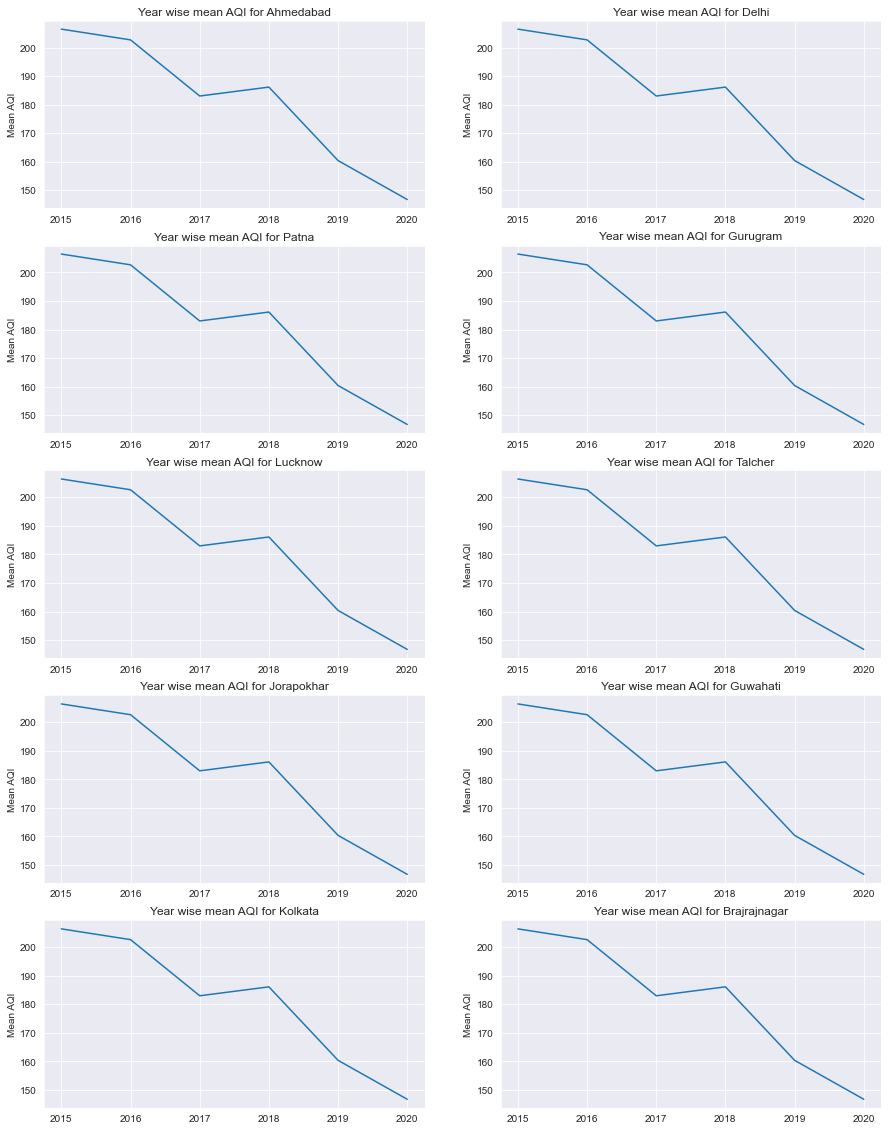

In [23]:
fig = plt.figure(figsize=(15,20))
for city, num in zip(top_cities, range(1,11)):
    data = df[df["City"]==city]
    data_by_year = df.groupby('year')['AQI'].mean().reset_index().dropna()
    ax = fig.add_subplot(5,2,num)
    ax.plot(data_by_year['year'],data_by_year['AQI'])
    ax.set_xticks(data_by_year['year'].tolist())
    ax.set_title("Year wise mean AQI for {}".format(city))
    ax.set_ylabel('Mean AQI')


# which city has highest no

In [24]:
df.head()

City       Date  PM2.5  PM10  NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad 2015-01-01    NaN   NaN NaN  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad 2015-01-02    NaN   NaN NaN  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad 2015-01-03    NaN   NaN NaN  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad 2015-01-04    NaN   NaN NaN  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad 2015-01-05    NaN   NaN NaN  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  year  
0  133.36     0.00     0.02    0.00  NaN        NaN  2015  
1   34.06     3.68     5.50    3.77  NaN        NaN  2015  
2   30.70     6.80    16.40    2.25  NaN        NaN  2015  
3   36.08     4.43    10.14    1.00  NaN        NaN  2015  
4   39.31     7.01    18.89    2.78  NaN        NaN  2015

In [25]:
data = df.fillna(0.0)

In [26]:
no = df.groupby('City')['NO'].mean().reset_index()
no = no.sort_values("NO")

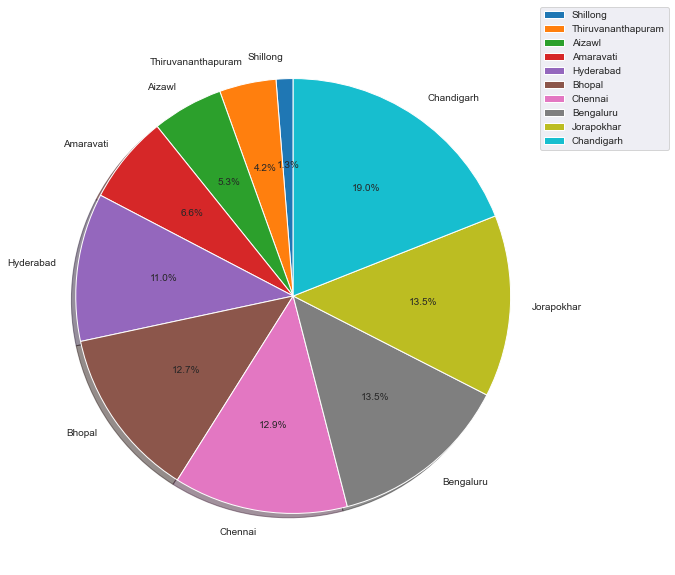

In [27]:
no=no.head(10)
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.pie(no['NO'].tolist(), labels=no['City'].tolist(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(loc='right', bbox_to_anchor=(1.2,0.9))
plt.show()

In [28]:
perc = data.loc[:, ["year", "City","NO"]]
perc['mean_NO']=perc.groupby([perc.City, perc.year])["NO"].transform('mean')
perc.drop('NO', axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc.sort_values('year', ascending=False)
top2 = ['Hyderbad', 'Bhopal', 'Jorapokhar', 'Chennai', 'Bengaluru']
perc = perc.loc[perc['City'].isin(top2)]
perc = perc.sort_values("year")
perc = perc.fillna(100)
fig = px.bar(perc, x='City', y='mean_NO', animation_frame="year", animation_group="City", color="City",
            hover_name="City")
fig.show() 

# distribution of NO, NO2 and others

C:\Users\Meow\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



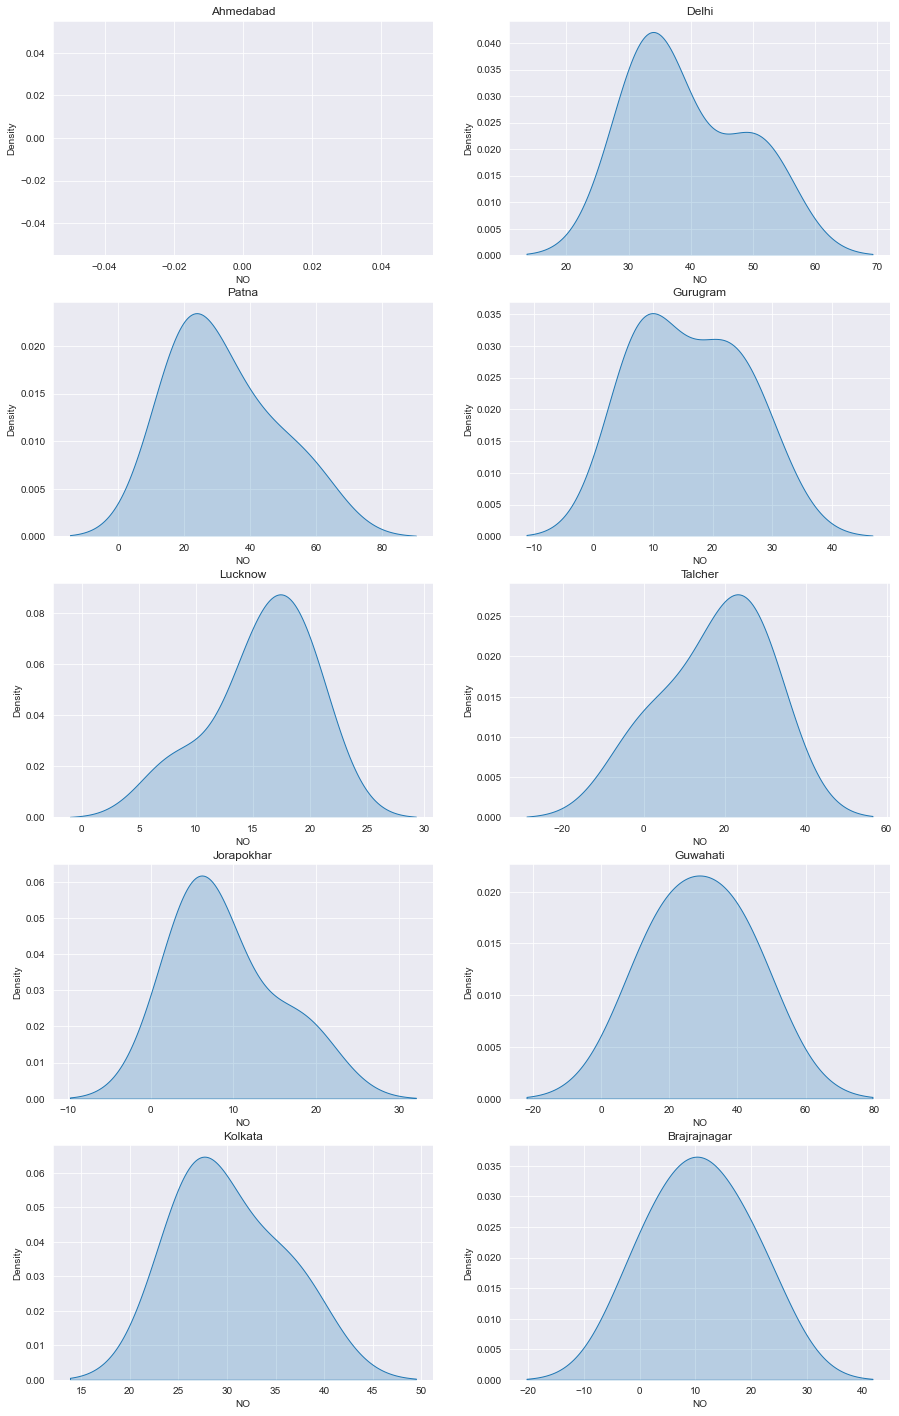

In [29]:
# city wise distribution of NO
fig = plt.figure(figsize=(15,25))
for city, num in zip(top_cities, range(1,11)):
    df = data[data['City']==city]
    df = df.groupby('year')['NO'].mean().reset_index().dropna()
    ax = fig.add_subplot(5,2,num)
    ax.set_title(city)
    sns.kdeplot(data=df['NO'], label="NO", shade=True)

C:\Users\Meow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



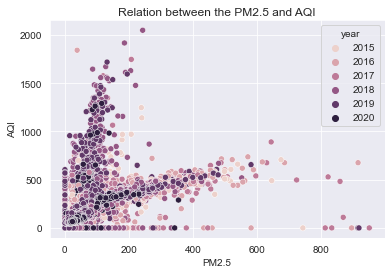

In [30]:
sns.scatterplot('PM2.5', 'AQI', hue='year', data=data)
plt.title("Relation between the PM2.5 and AQI")
plt.xlabel('PM2.5')
plt.ylabel('AQI')
plt.show()

In [31]:
data.head(2)

City       Date  PM2.5  PM10   NO    NO2    NOx  NH3    CO    SO2  \
0  Ahmedabad 2015-01-01    0.0   0.0  0.0  18.22  17.15  0.0  0.92  27.64   
1  Ahmedabad 2015-01-02    0.0   0.0  0.0  15.69  16.46  0.0  0.97  24.55   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  year  
0  133.36     0.00     0.02    0.00  0.0        0.0  2015  
1   34.06     3.68     5.50    3.77  0.0        0.0  2015

C:\Users\Meow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Meow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Meow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Meow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: F

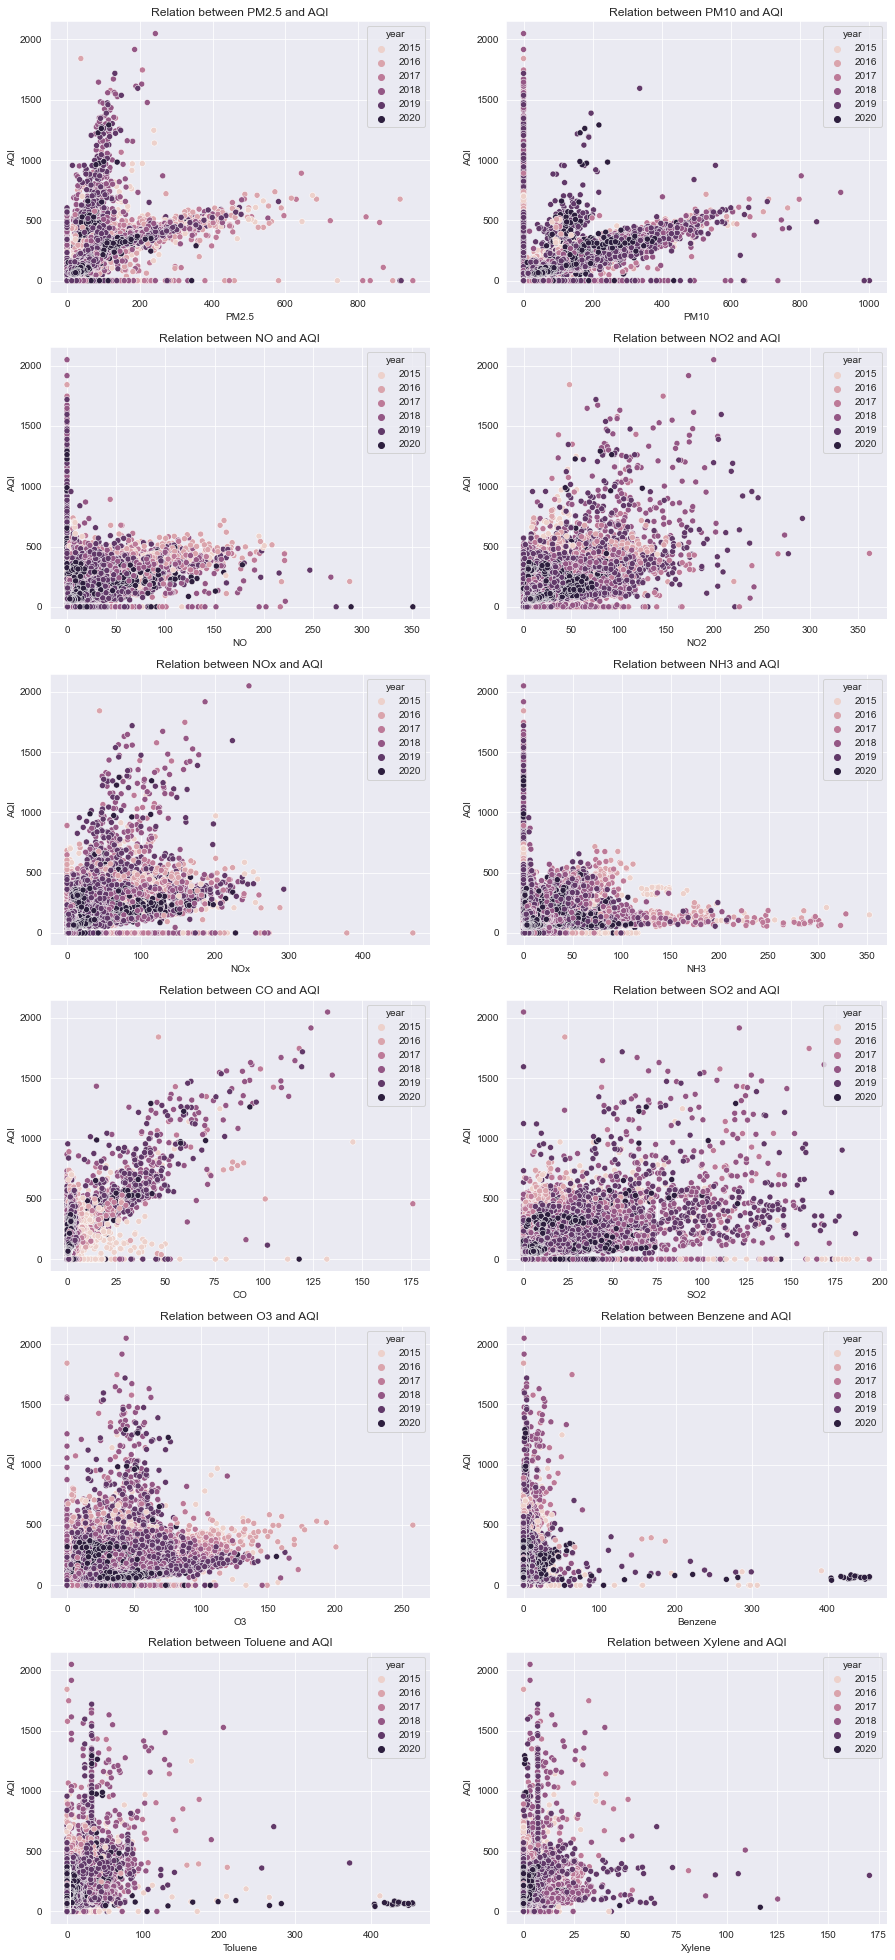

In [38]:
variables = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx',"NH3",'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
fig= plt.figure(figsize=(15,35))
for variable, num in zip(variables, range(1, len(variables) + 1)):
    ax = fig.add_subplot(6,2,num)
    sns.scatterplot(variable, 'AQI', hue='year', data=data)
    plt.title('Relation between {} and AQI'.format(variable))
    plt.xlabel(variable)
    plt.ylabel('AQI')

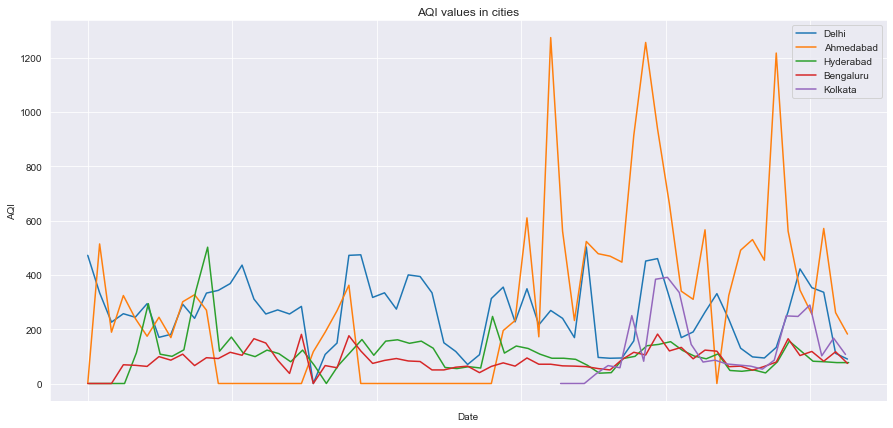

In [40]:
# Linechart of cities (AQI vs Date)
cities = ['Delhi', 'Ahmedabad', 'Hyderabad', 'Bengaluru', 'Kolkata']
fig, ax = plt.subplots(figsize=(15,7))

for city in cities:
    sns.lineplot(x="Date", y="AQI", data=data[data['City']==city].iloc[::30], label=city)

ax.set_xticklabels(ax.get_xticklabels(cities), rotation=45)

ax.set_title('AQI values in cities')
ax.legend()